In [ ]:
import pandas as pd


In [ ]:
url = "/content/IMDB Top 250 Movies.csv"
df = pd.read_csv(url)

In [ ]:
df.head()  # Show the first few rows

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [ ]:
df.info()  # Show data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [ ]:
df.describe()  # Get summary statistics like mean, median, etc.

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [ ]:
# Check for missing values
df.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [ ]:
# Drop rows with missing values (not recommended for all cases)
df.dropna(inplace=True)

In [ ]:
# Fill missing values with a specific value (e.g., median)
df['rank'].fillna(df['rank'].median(), inplace=True)
df['year'].fillna(df['year'].median(), inplace=True)
df['rating'].fillna(df['rating'].median(), inplace=True)

In [ ]:
average_rating = df['rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 8.31


In [ ]:
average_rating_genre = df.groupby('genre')['rating'].mean()
print(average_rating_genre)

genre
Action,Adventure            8.300000
Action,Adventure,Comedy     8.100000
Action,Adventure,Drama      8.700000
Action,Adventure,Fantasy    8.380000
Action,Adventure,Mystery    8.300000
                              ...   
Horror,Mystery,Thriller     8.500000
Horror,Sci-Fi               8.500000
Mystery,Romance,Thriller    8.300000
Mystery,Thriller            8.366667
Western                     8.350000
Name: rating, Length: 104, dtype: float64


In [ ]:
highest_rated_movie = df.sort_values(by='rating', ascending=False).head(1)
print(highest_rated_movie)

   rank                      name  year  rating  genre certificate run_time  \
0     1  The Shawshank Redemption  1994     9.3  Drama           R   2h 22m   

                                             tagline    budget box_office  \
0  Fear can hold you prisoner. Hope can set you f...  25000000   28884504   

                                               casts       directors  \
0  Tim Robbins,Morgan Freeman,Bob Gunton,William ...  Frank Darabont   

                       writers  
0  Stephen King,Frank Darabont  


In [ ]:
# Import libraries (if not already installed)
# !pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns


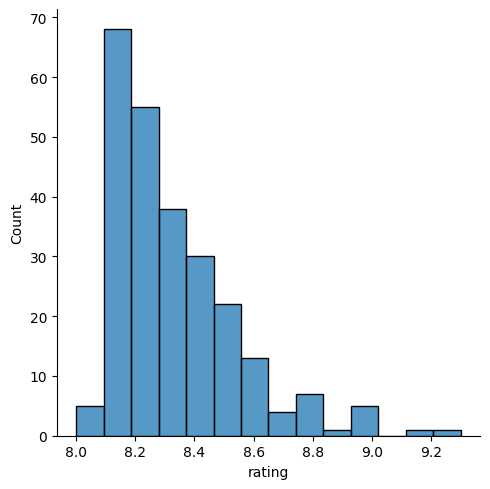

In [ ]:
# prompt: Visualizations (Optional):

# Visualize the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Distribution of Movie Ratings', fontsize=14)
plt.show()

# Visualize the average rating for each genre
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_genre.index, y=average_rating_genre.values, color='lightblue', edgecolor='black')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Average Rating by Genre', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df.to_csv('analyzed_movies.csv', index=False)